In [121]:
import numpy as np
from skimage.measure import label, regionprops
from skimage import color
from matplotlib import pyplot as plt
from collections import defaultdict 
import colorsys

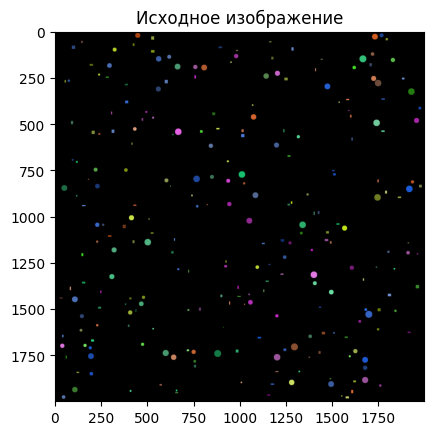

In [122]:
image = plt.imread('balls_and_rects.png')

fig, ax = plt.subplots()
ax.title.set_text("Исходное изображение")
plt.imshow(image)
plt.show()

hsv_image = color.rgb2hsv(image)

In [123]:
binary = hsv_image[:, :, 0].copy()
binary[binary > 0] = 1
labeled = label(binary)

regions = regionprops(labeled)

In [124]:
def get_hue(reg, hsv_image):
  cy, cx = reg.centroid
  return round(hsv_image[int(cy), int(cx), 0], 4)  # будут одинаковые оттенки, не видимые нашим глазом

hue_counter = defaultdict(int)  # defaultdict чтобы упростить работу со словарями
hue_counter_for_circle = defaultdict(int)
hue_counter_for_rectange = defaultdict(int)

for reg in regions:
  hue = get_hue(reg, hsv_image)
  hue_counter[hue] += 1  # считаем общее кол-во фигур по оттенкам
  if (reg.area != reg.area_bbox): 
    hue_counter_for_circle[hue] += 1
  else:
    hue_counter_for_rectange[hue] += 1

In [125]:
def encode_hex(color):
    r = int(color[0] * 255)
    g = int(color[1] * 255)
    b = int(color[2] * 255)
    
    hex = '#' + str(bytearray([r,g,b]).hex()) # переводим в hex, чтобы отобразить оттенки 
    return hex

In [126]:
def show_hist(name, hue_counter):
    cell_text = []
    colors = []

    for hue in sorted(hue_counter.keys()):  # сортиртируем оттенки
        cell_text.append(hue_counter[hue])  # количество повторений
        rgb_color = colorsys.hsv_to_rgb(hue, 1, 1)
        colors.append(encode_hex(rgb_color))  # оттенок
        
    fig, ax = plt.subplots(figsize=(0.5 * len(cell_text) / 2.54, 0.5 / 2.54))  # ширина и высота 0.5 см на каждую ячейку 
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')  # убрала оси, чтобы выглядело красиво
    ax.title.set_text(name)

    ax.table(cellText=[cell_text], colColours=colors, loc='bottom')  # таблица для отображения оттенков и количества
    plt.show()

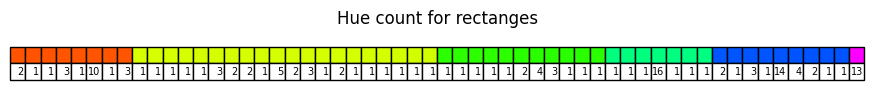

In [127]:
show_hist("Hue count for rectanges", hue_counter_for_rectange)  # количество прямоугольников по оттенкам

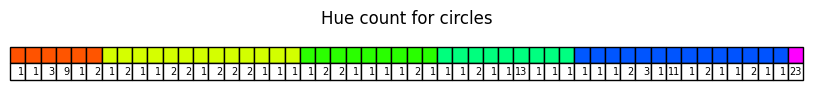

In [128]:
show_hist("Hue count for circles", hue_counter_for_circle)  # количество кругов по оттенкам

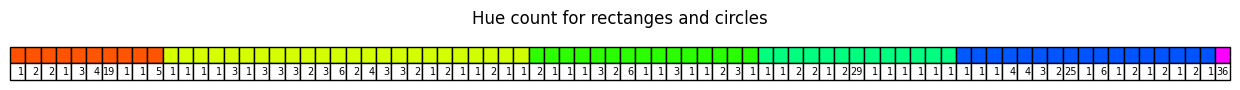

In [129]:
show_hist("Hue count for rectanges and circles", hue_counter)  # количество всех фигур по оттенкам